# Present Values

## Overview

This lecture describes the  **present value model** that is a starting point
of much asset pricing theory.

We’ll use the calculations described here in several subsequent lectures.

Our only tool is some elementary linear algebra operations, namely, matrix multiplication and matrix inversion.

Let’s dive in.

Let

- $ \{d_t\}_{t=0}^T $ be a sequence of dividends or “payouts”  
- $ \{p_t\}_{t=0}^T $ be a sequence of prices of a claim on the continuation of
  the asset stream from date $ t $ on, namely, $ \{d_s\}_{s=t}^T $  
- $ \delta  \in (0,1) $ be a one-period “discount factor”  
- $ p_{T+1}^* $ be a terminal price of the asset at time $ T+1 $  


We  assume that the dividend stream $ \{d_t\}_{t=0}^T $ and the terminal price
$ p_{T+1}^* $ are both exogenous.

Assume the sequence of asset pricing equations


<a id='equation-eq-euler1'></a>
$$
p_t = d_t + \delta p_{t+1}, \quad t = 0, 1, \ldots , T \tag{8.1}
$$

This is a “cost equals benefits” formula.

It says that the cost of buying the asset today equals the reward for holding it
for one period (which is the dividend $ d_t $) and then selling it, at $ t+1 $.

The future value $ p_{t+1} $ is discounted using $ \delta $ to shift it to a present value, so it is comparable with $ d_t $ and $ p_t $.

We want to solve for the asset price sequence  $ \{p_t\}_{t=0}^T $ as a function
of $ \{d_t\}_{t=0}^T $ and $ p_{T+1}^* $.

In this lecture we show how this can be done using matrix algebra.

We will use the following imports

In [15]:
import numpy as np
import matplotlib.pyplot as plt

## Present value calculations

The equations in [(8.1)](#equation-eq-euler1) can be stacked, as in


<a id='equation-eq-euler-stack'></a>
$$
\begin{aligned}
    p_0 & = d_0 + \delta p_1 \\
    p_1 & = d_1 + \delta p_2 \\
    \vdots \\
    p_{T-1} & = d_{T-1} + \delta p_T \\
    p_T & = d_T + \delta p^*_{T+1}
\end{aligned} \tag{8.2}
$$

Write the system [(8.2)](#equation-eq-euler-stack) of $ T+1 $ asset pricing  equations as the single matrix equation


<a id='equation-eq-pvpieq'></a>
$$
\begin{bmatrix} 1 & -\delta & 0 & 0 & \cdots & 0 & 0 \cr
                    0 & 1 & -\delta & 0 & \cdots & 0 & 0 \cr
                    0 & 0 & 1 & -\delta & \cdots & 0 & 0 \cr
                    \vdots & \vdots & \vdots & \vdots & \vdots & 0 & 0 \cr
                    0 & 0 & 0 & 0 & \cdots & 1 & -\delta \cr
                    0 & 0 & 0 & 0 & \cdots & 0 & 1 \end{bmatrix}
    \begin{bmatrix} p_0 \cr p_1 \cr p_2 \cr \vdots \cr p_{T-1} \cr p_T 
    \end{bmatrix} 
    =  \begin{bmatrix}  
    d_0 \cr d_1 \cr d_2 \cr \vdots \cr d_{T-1} \cr d_T
    \end{bmatrix}
    + \begin{bmatrix} 
    0 \cr 0 \cr 0 \cr \vdots \cr 0 \cr \delta p_{T+1}^*
    \end{bmatrix} \tag{8.3}
$$

## Exercise 8.1

Carry out the matrix multiplication in [(8.3)](#equation-eq-pvpieq) by hand and confirm that you
recover the equations in [(8.2)](#equation-eq-euler-stack).

In vector-matrix notation, we can write the system [(8.3)](#equation-eq-pvpieq) as


<a id='equation-eq-apdb'></a>
$$
A p = d + b \tag{8.4}
$$

Here $ A $ is the matrix on the left side of equation [(8.3)](#equation-eq-pvpieq), while

$$
p = 
    \begin{bmatrix}
        p_0 \\
        p_1 \\
        \vdots \\
        p_T
    \end{bmatrix},
    \quad
    d = 
    \begin{bmatrix}
        d_0 \\
        d_1 \\
        \vdots \\
        d_T
    \end{bmatrix},
    \quad \text{and} \quad
    b = 
    \begin{bmatrix}
        0 \\
        0 \\
        \vdots \\
        p^*_{T+1}
    \end{bmatrix}
$$

The solution for prices is given by


<a id='equation-eq-apdb-sol'></a>
$$
p = A^{-1}(d + b) \tag{8.5}
$$

Here is a small example, where the dividend stream is given by

$$
d_{t+1} = 1.05 d_t, \quad t = 0, 1, \ldots , T-1.
$$

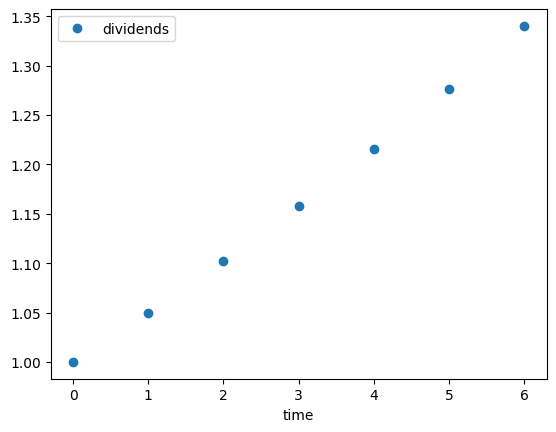

In [16]:
T = 6
current_d = 1.0
d = []
for t in range(T+1):
    d.append(current_d)
    current_d = current_d * 1.05 

fig, ax = plt.subplots()
ax.plot(d, 'o', label='dividends')
ax.legend()
ax.set_xlabel('time')
plt.show()

We set $ \delta $ and $ p_{T+1}^* $ to

In [17]:
δ = 0.99
p_star = 10.0

Let’s build the matrix $ A $

In [18]:
A = np.zeros((T+1, T+1))
for i in range(T+1):
    for j in range(T+1):
        if i == j:
            A[i, j] = 1
            if j < T:
                A[i, j+1] = -δ

Let’s inspect $ A $

In [19]:
A

array([[ 1.  , -0.99,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  1.  , -0.99,  0.  ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  1.  , -0.99,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  1.  , -0.99,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  1.  , -0.99,  0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  , -0.99],
       [ 0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  1.  ]])

Now let’s solve for prices using [(8.5)](#equation-eq-apdb-sol).

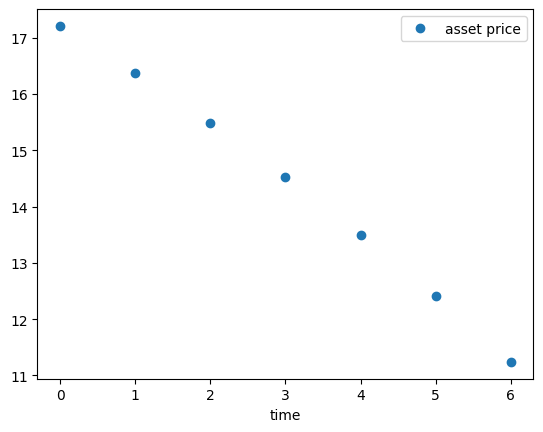

In [24]:
b = np.zeros(T+1)
b[-1] = δ * p_star
p = np.linalg.solve(A, d + b)
fig, ax = plt.subplots()
ax.plot(p, 'o', label='asset price')
ax.legend()
ax.set_xlabel('time')
plt.show()

We can also consider a cyclically growing dividend sequence, such as

$$
d_{t+1} = 1.01 d_t + 0.1 \sin t, \quad t = 0, 1, \ldots , T-1.
$$

In [ ]:
T = 100
current_d = 1.0
d = []
for t in range(T+1):
    d.append(current_d)
    current_d = current_d * 1.01 + 0.1 * np.sin(t)

fig, ax = plt.subplots()
ax.plot(d, 'o-', ms=4, alpha=0.8, label='dividends')
ax.legend()
ax.set_xlabel('time')
plt.show()

## Exercise 8.2

Compute the corresponding asset price sequence when $ p^*_{T+1} = 0 $ and $ \delta
= 0.98 $.

## Solution to[ Exercise 8.2](https://intro.quantecon.org/#pv_ex_cyc)

We proceed as above after modifying parameters and $ A $.

In [ ]:
δ = 0.98
p_star = 0.0
A = np.zeros((T+1, T+1))
for i in range(T+1):
    for j in range(T+1):
        if i == j:
            A[i, j] = 1
            if j < T:
                A[i, j+1] = -δ

b = np.zeros(T+1)
b[-1] = δ * p_star
p = np.linalg.solve(A, d + b)
fig, ax = plt.subplots()
ax.plot(p, 'o-', ms=4, alpha=0.8, label='asset price')
ax.legend()
ax.set_xlabel('time')
plt.show()

The weighted averaging associated with the present value calculation largely
eliminates the cycles.

## Analytical expressions

It can be verified that the  inverse of the matrix $ A $ in [(8.3)](#equation-eq-pvpieq) is


<a id='equation-eq-ainv'></a>
$$
A^{-1} = 
    \begin{bmatrix}
        1 & \delta & \delta^2 & \cdots & \delta^{T-1} & \delta^T \cr
        0 & 1 & \delta & \cdots & \delta^{T-2} & \delta^{T-1} \cr
        \vdots & \vdots & \vdots & \cdots & \vdots & \vdots \cr
        0 & 0 & 0 & \cdots & 1  & \delta \cr
        0 & 0 & 0 & \cdots & 0 & 1 \cr
    \end{bmatrix} \tag{8.6}
$$

## Exercise 8.3

Check this by showing that $ A A^{-1} $ is equal to the identity matrix.

(By the [inverse matrix theorem](https://en.wikipedia.org/wiki/Invertible_matrix), a matrix $ B $ is the inverse of $ A $ whenever $ A B $ is the identity.)

If we use the expression [(8.6)](#equation-eq-ainv) in [(8.5)](#equation-eq-apdb-sol) and perform the indicated matrix multiplication, we shall find  that


<a id='equation-eq-ptpveq'></a>
$$
p_t =  \sum_{s=t}^T \delta^{s-t} d_s +  \delta^{T+1-t} p_{T+1}^* \tag{8.7}
$$

Pricing formula [(8.7)](#equation-eq-ptpveq) asserts that  two components sum to the asset price
$ p_t $:

- a **fundamental component** $ \sum_{s=t}^T \delta^{s-t} d_s $ that equals the discounted present value of prospective dividends  
- a **bubble component** $ \delta^{T+1-t} p_{T+1}^* $  


The fundamental component is pinned down by the discount factor $ \delta $ and the
“fundamentals” of the asset (in this case, the dividends).

The bubble component is the part of the price that is not pinned down by
fundamentals.

It is sometimes convenient to rewrite the bubble component as

$$
c \delta^{-t}
$$

where

$$
c \equiv \delta^{T+1}p_{T+1}^*
$$

## More about bubbles

For a few moments, let’s focus on  the special case of an asset that  will never pay dividends, in which case

$$
\begin{bmatrix}  
d_0 \cr d_1 \cr d_2 \cr \vdots \cr d_{T-1} \cr d_T
\end{bmatrix} = 
\begin{bmatrix}  
0 \cr 0 \cr 0 \cr \vdots \cr 0 \cr 0
\end{bmatrix}
$$

In this case  system [(8.1)](#equation-eq-euler1) of our $ T+1 $ asset pricing  equations takes the
form of the single matrix equation


<a id='equation-eq-pieq2'></a>
$$
\begin{bmatrix} 1 & -\delta & 0 & 0 & \cdots & 0 & 0 \cr
                0 & 1 & -\delta & 0 & \cdots & 0 & 0 \cr
                0 & 0 & 1 & -\delta & \cdots & 0 & 0 \cr
                \vdots & \vdots & \vdots & \vdots & \vdots & 0 & 0 \cr
                0 & 0 & 0 & 0 & \cdots & 1 & -\delta \cr
                0 & 0 & 0 & 0 & \cdots & 0 & 1 \end{bmatrix}
\begin{bmatrix} p_0 \cr p_1 \cr p_2 \cr \vdots \cr p_{T-1} \cr p_T 
\end{bmatrix}  =
\begin{bmatrix} 
0 \cr 0 \cr 0 \cr \vdots \cr 0 \cr \delta p_{T+1}^*
\end{bmatrix} \tag{8.8}
$$

Evidently, if $ p_{T+1}^* = 0 $, a price vector $ p $ of all entries zero
solves this equation and the only the **fundamental** component of our pricing
formula [(8.7)](#equation-eq-ptpveq) is present.

But let’s activate the **bubble**  component by setting


<a id='equation-eq-eqbubbleterm'></a>
$$
p_{T+1}^* = c \delta^{-(T+1)} \tag{8.9}
$$

for some positive constant $ c $.

In this case, it can be verified that when we multiply both sides of [(8.8)](#equation-eq-pieq2) by
the matrix $ A^{-1} $ presented in equation [(8.6)](#equation-eq-ainv), we shall find that


<a id='equation-eq-bubble'></a>
$$
p_t = c \delta^{-t} \tag{8.10}
$$

## Gross rate of return

Define the gross rate of return on holding the asset from period $ t $ to period $ t+1 $
as


<a id='equation-eq-rateofreturn'></a>
$$
R_t = \frac{p_{t+1}}{p_t} \tag{8.11}
$$

Equation [(8.10)](#equation-eq-bubble) confirms that an asset whose  sole source of value is a bubble
that earns a  gross rate of return

$$
R_t = \delta^{-1} > 1 .
$$

## Exercises

## Exercise 8.4

Give analytical expressions for the asset price $ p_t $ under the
following settings for $ d $ and $ p_{T+1}^* $:

1. $ p_{T+1}^* = 0, d_t = g^t d_0 $ (a modified version of the Gordon growth formula)  
1. $ p_{T+1}^* = g^{T+1} d_0,  d_t = g^t d_0 $ (the plain vanilla  Gordon growth formula)  
1. $ p_{T+1}^* = 0, d_t = 0 $ (price of a worthless stock)  
1. $ p_{T+1}^* = c \delta^{-(T+1)}, d_t = 0 $ (price of a pure bubble stock)  